In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import os

## Import Data

In [4]:
# Mengimpor data
main_data = pd.read_excel('main_data.xlsx').iloc[:,4:]

In [5]:
main_data

,VP,POP,RC,OC,UU,IPEND,IPENG,TKI
0,1182411,5459668,22801199.16,861621,15242,58.68,68.14,3652300
1,1179833,2434221,15308903.34,773783,15801,55.41,62.73,2231250
2,646436,2243904,11298225.95,682323,1257,54.66,58.69,1597440
3,4813250,3534114,18307706.43,816764,13999,61.75,68.16,2325400
4,604112,2548723,12523549.46,610757,9846,55.18,58.69,1703200
...,...,...,...,...,...,...,...,...
103,6294557,2931897,22458187.79,1670748,10418,75.19,84.03,1310040
104,4902524,2330333,19730607.31,1561971,10540,74.78,83.06,1742180
105,1464770,607811,34867094.93,1396817,6181,74.72,75.51,1948770
106,1217229,662723,22421475.77,1140712,10005,67.41,69.69,1241420


Keterangan satuan variabel dataset </br>
**Variabel Dependent** </br>
* volume_produksi sampah: liter/hari

**Variabel Independent** </br>

* populasi: orang
* rev_capita (PDRB per kapita atas dasar harga konstan): rupiah
* pengeluatan per kapita sebulan: rupiah
* 



## Exploratory Data Analysis

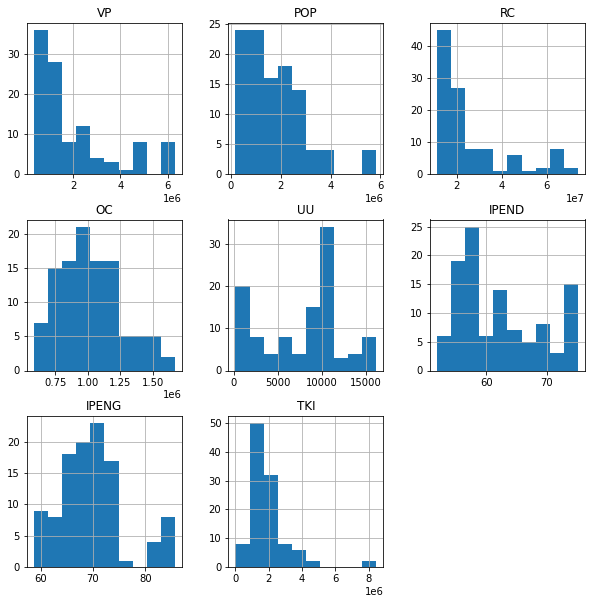

In [6]:
main_data.hist(figsize=(10,10))
plt.show()

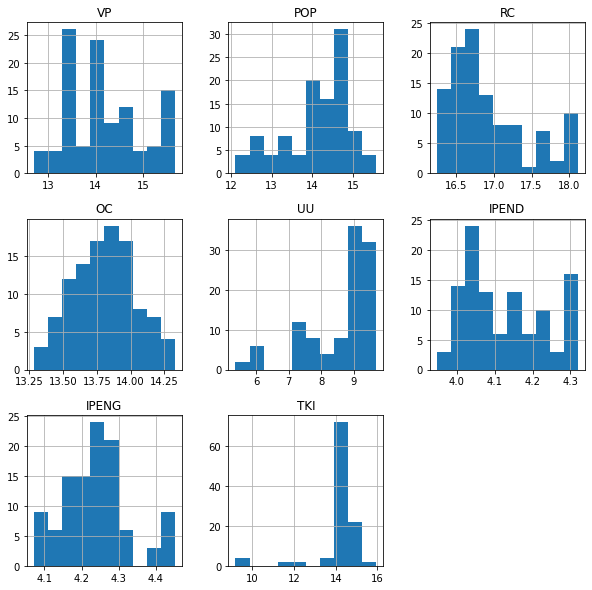

In [7]:
data_log = np.log(main_data)
data_log.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

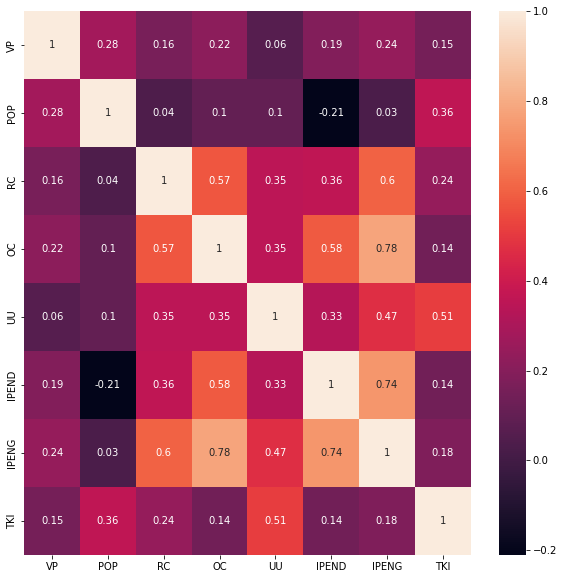

In [8]:
plt.figure(figsize=(10,10))
correlation_matrix = data_log.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Distribusi variabel volume sampah

In [28]:
# pisahin x sama y
y = data_log['VP']
x = data_log.iloc[:,[1,3,5,6]]
print(y)
print(x)

0      13.983066
1      13.980883
2      13.379229
3      15.386883
4      13.311515
         ...    
103    15.655196
104    15.405261
105    14.197209
106    14.012088
107    12.723502
Name: VP, Length: 108, dtype: float64
           POP         OC     IPEND     IPENG
0    15.512899  13.666571  4.072099  4.221564
1    14.705137  13.559047  4.014760  4.138840
2    14.623728  13.433258  4.001132  4.072269
3    15.077973  13.613105  4.123094  4.221858
4    14.751103  13.322454  4.010601  4.072269
..         ...        ...       ...       ...
103  14.891160  14.328782  4.320018  4.431174
104  14.661522  14.261459  4.314550  4.419563
105  13.317619  14.149707  4.313748  4.324265
106  13.404112  13.947163  4.210793  4.244057
107  12.116252  14.012543  4.179451  4.264509

[108 rows x 4 columns]


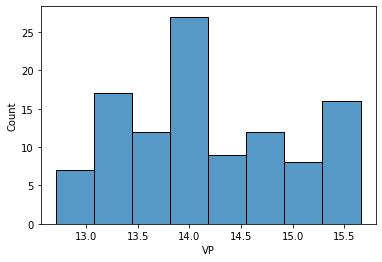

In [11]:
# Cek distribusi outcome variabel
sns.histplot(y, stat='count')
plt.show()

## Model
$$
log(VP) = \alpha_{1}+\alpha_{2}log(POP)+\alpha_{3}log(OC)+\alpha_{4}log(IPEND)+\alpha_{5}log(IPENG)$$

In [29]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(X_train)
print(X_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

           POP         OC     IPEND     IPENG
22   14.814238  13.938178  4.287716  4.415945
35   14.577717  13.590956  4.003325  4.226104
46   12.679499  13.943020  4.220977  4.242477
87   13.988311  13.891849  4.148043  4.212868
86   14.375866  13.723497  4.067829  4.133405
..         ...        ...       ...       ...
16   14.303737  13.430733  4.038479  4.118061
102  12.664374  13.907160  4.238878  4.305820
61   13.881486  13.750289  4.060443  4.189806
78   13.306515  14.045216  4.312944  4.304200
99   13.907933  14.114101  4.269697  4.304065

[86 rows x 4 columns]
           POP         OC     IPEND     IPENG
85   14.773480  13.866913  4.056643  4.122932
10   13.944144  13.633537  4.117247  4.217299
20   14.724361  13.899648  4.289774  4.427717
23   14.560349  13.948782  4.294697  4.398515
63   13.992589  13.772650  4.040064  4.194793
54   15.558606  13.991895  4.105285  4.246064
42   15.030925  14.121316  4.148517  4.268858
56   14.629365  13.684145  4.026958  4.102974
28   14.709

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

## Evaluasi Model

In [31]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.738026705709209
R2 score is 0.11250586374726601


The model performance for testing set
--------------------------------------
RMSE is 0.7356278958005326
R2 score is 0.1303607391599787


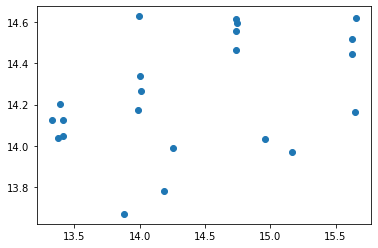

In [15]:
plt.scatter(Y_test, y_test_predict)
plt.show()

In [32]:
import pickle
pickle.dump(lin_model, open('./model.pkl', 'wb'))

In [37]:
main_data.describe()

,VP,POP,RC,OC,UU,IPEND,IPENG,TKI
count,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,108.000000,108.000000,108.000000,1.080000e+02
mean,1.996094e+06,1.766765e+06,2.603577e+07,1.021595e+06,7834.768519,62.228889,69.638241,1.908560e+06
std,1.714136e+06,1.207772e+06,1.636243e+07,2.354792e+05,4634.190029,6.805955,6.300936,1.272153e+06
min,3.305670e+05,1.814250e+05,1.129823e+07,5.874700e+05,214.000000,51.790000,58.690000,9.790000e+03
25%,7.832455e+05,9.508948e+05,1.560449e+07,8.468110e+05,2527.000000,56.695000,65.502500,1.305550e+06
50%,1.211173e+06,1.657448e+06,1.868715e+07,1.000950e+06,9540.500000,60.115000,69.175000,1.667640e+06
75%,2.532243e+06,2.436820e+06,3.080354e+07,1.145112e+06,10864.250000,67.582500,72.292500,1.965652e+06
max,6.312446e+06,5.840907e+06,7.392403e+07,1.670748e+06,16165.000000,75.190000,85.680000,8.453930e+06


In [33]:
# Mengunggah model
model_file = open('model.pkl', 'rb')
model_new = pickle.load(model_file, encoding='bytes')
cobain = [[109801, 1000000, 80, 90]]

In [36]:
prediction = model_new.predict(np.log(cobain))
output = np.exp(prediction)
output[0]

/home/peminumyakult/anaconda3/envs/penv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


785682.8716848042